# random sampling

In [79]:
options(repr.plot.width=8, repr.plot.height=4)

In [9]:
#rbinom,rbeta,rchisq,rpois,rexp

x1 = rnorm(10)
x2 = rnorm(100)
x3 = rnorm(1000)
x4 = rnorm(10000)

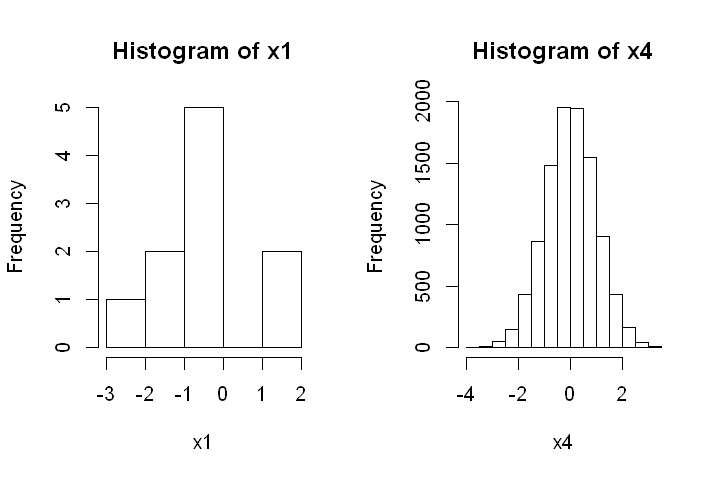

In [10]:
par(mfrow=c(1,2))
hist(x1)
hist(x4)

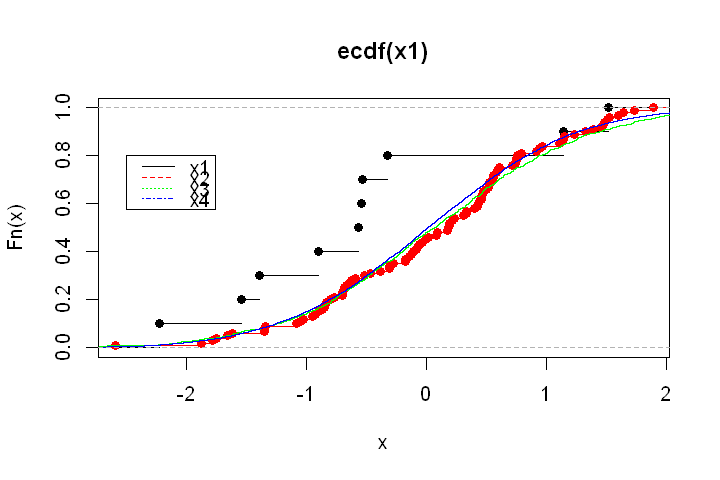

In [29]:

par(mfrow = c(1,1))

plot(ecdf(x1))
lines(ecdf(x2),col='red')
lines(ecdf(x3),col='green')
lines(ecdf(x4),col='blue')
legend(-2.5,.8,legend=c("x1","x2","x3","x4"),col=c("black","red","green", "blue"),lty=1:4)

In [30]:
mean(x1)
var(x1)

[1] -0.5374002

[1] 1.316294

# central limit theorem

In [104]:
n = vector()
for (i in seq(10,500,10)){
 n<-c(n,5*i)
}

df = matrix(,0,3)
repetitions=100

for (i in 1:length(n)){
#     m = vector()
#     v = vector()
    for (j in 1:repetitions){
        x = rnorm(n[i])
#         m = c(m,mean(x))
#         v = c(v,var(x))
        df = rbind(df,c(n[i],mean(x),var(x)))
    }  
}

colnames(df) = c("n","mean","var")
# df = df[-1,]

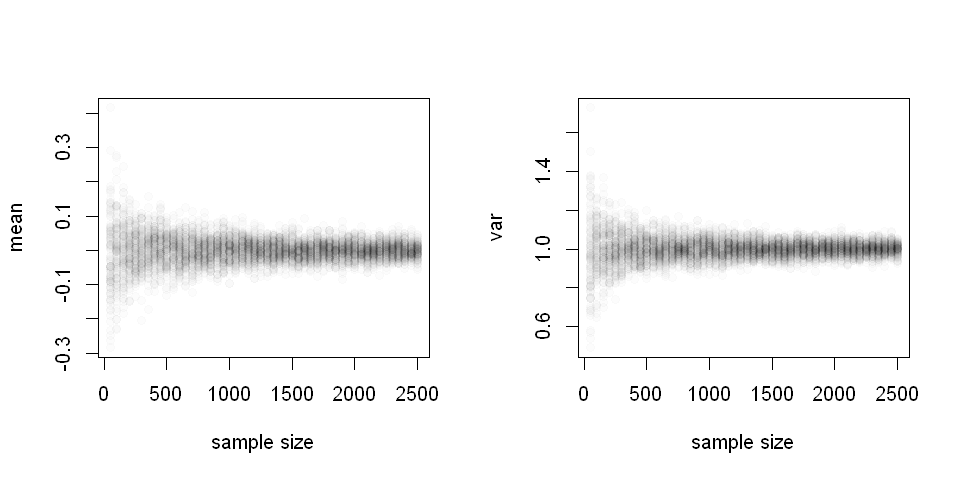

In [105]:
par(mfrow=c(1,2))
plot(df[,'n'],df[,'mean'],xlab="sample size",ylab="mean",pch=19,col=rgb(0,0,0,.01))
plot(df[,'n'],df[,'var'],,xlab="sample size",ylab="var",pch=19,col=rgb(0,0,0,.01))

In [97]:
ci_mean = matrix(,0,3)
for (n in unique(df[,"n"])){
    ci_mean = rbind(ci_mean,c(n,quantile(df[df[,"n"]==n,"mean"],c(0.025,0.975))))
}
colnames(ci_mean) = c("n","ci_low","ci_hi")

ci_var = matrix(,0,3)
for (n in unique(df[,"n"])){
    ci_var = rbind(ci_var,c(n,quantile(df[df[,"n"]==n,"var"],c(0.025,0.975))))
}
colnames(ci_var) = c("n","ci_low","ci_hi")

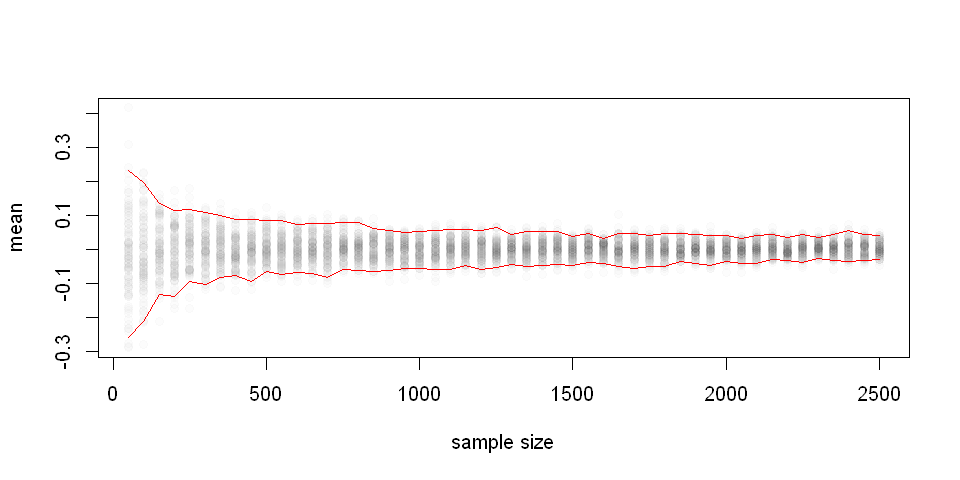

In [101]:
plot(df[,"n"],df[,"mean"],xlab="sample size",ylab="mean",pch=19,col=rgb(0,0,0,.01))
lines(ci_mean[,'n'],ci_mean[,'ci_low'],col="red")
lines(ci_mean[,'n'],ci_mean[,'ci_hi'],col="red")

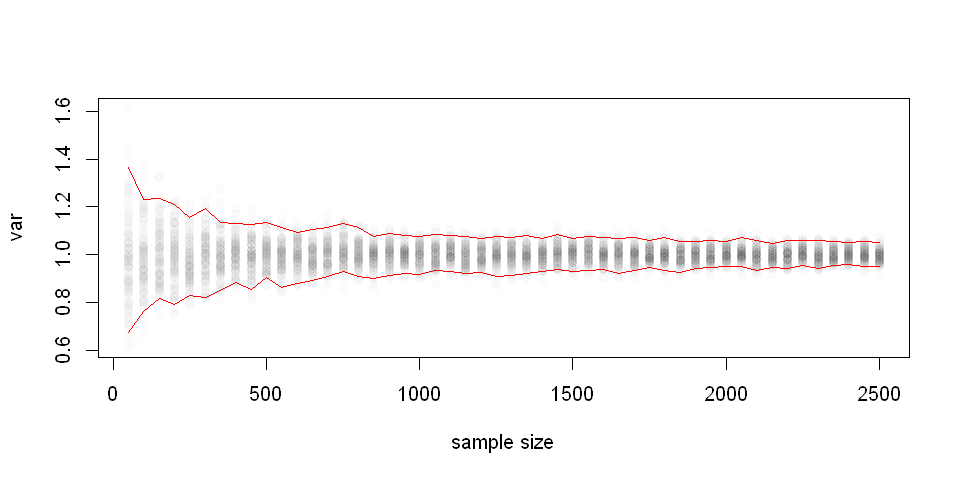

In [100]:
plot(df[,"n"],df[,"var"],xlab="sample size",ylab="var",pch=19,col=rgb(0,0,0,.01))
lines(ci_var[,'n'],ci_var[,'ci_low'],col="red")
lines(ci_var[,'n'],ci_var[,'ci_hi'],col="red")

In [129]:
n = vector()
for (i in seq(10,500,10)){
 n<-c(n,5*i)
}

df = matrix(,0,3)
repetitions=100

for (i in 1:length(n)){
#     m = vector()
#     v = vector()
    for (j in 1:repetitions){
        x = rnorm(n[i],1.6,1)
#         m = c(m,mean(x))
#         v = c(v,var(x))
        df = rbind(df,c(n[i],sum(x),var(x)))
    }  
}

colnames(df) = c("n","sum","var")
# df = df[-1,]

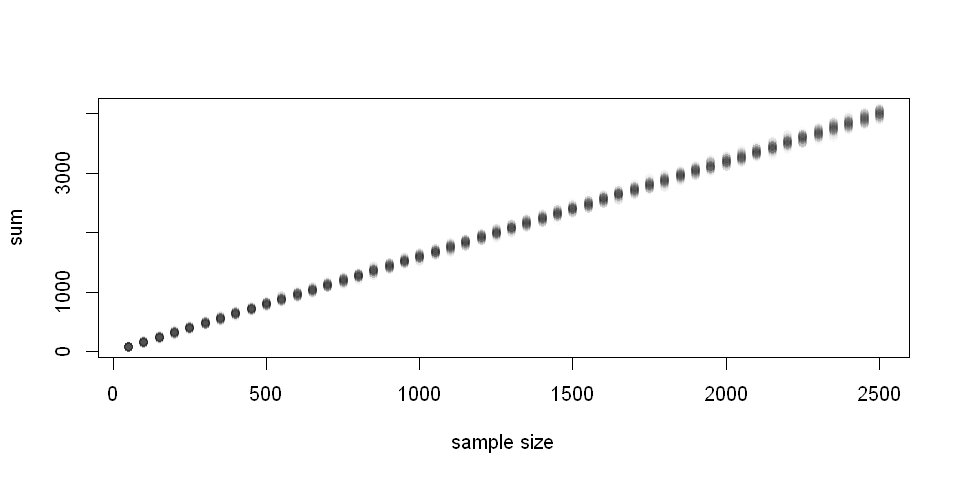

In [130]:
plot(df[,"n"],df[,"sum"],xlab="sample size",ylab="sum",pch=19,col=rgb(0,0,0,.01))
# lines(c(0,2500),c(0,0))

In [131]:
vals = df[(df[,"n"]==500),]

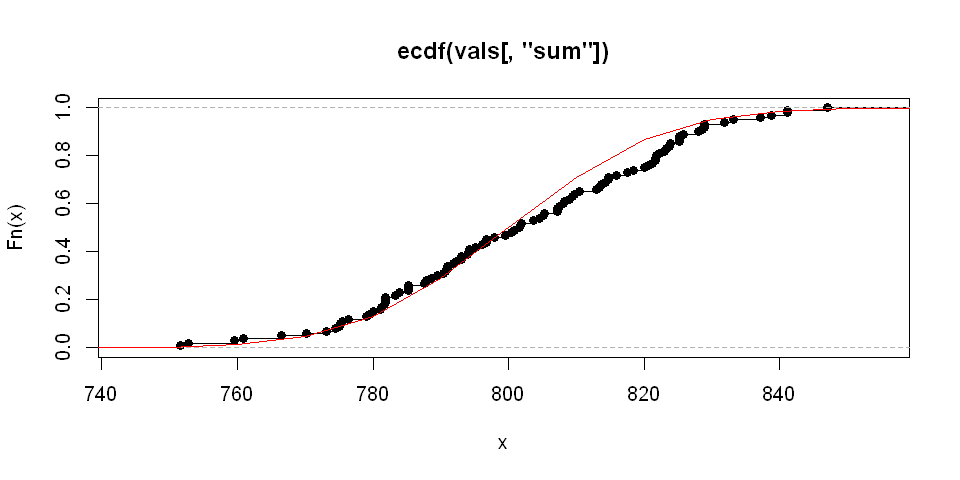

In [142]:
plot(ecdf(vals[,"sum"]))
lines(seq(700,900,10),pnorm(seq(700,900,10),500*1.6,sqrt(500)*0.8),col='red')

# Confidence intervals

check how often the true mean of a sum of variables is inside the confidence interval (assuming a normal)


In [222]:
repetitions = 5000
# sample_size=10
mu = 1

q_lo = qnorm(0.025)
q_hi = qnorm(0.975)

ns = vector()
counts = vector()

for(sample_size in seq(2,100,2)){
    count = 0
    ns =c(ns,sample_size)
    for (i in 1:repetitions){
#         x = rexp(sample_size,rate=1/mu)
        x = rnorm(sample_size,mu,1)
        m = mean(x)
        s = sd(x)

        lowerbound = m+q_lo*s/sqrt(sample_size)
        upperbound = m+q_hi*s/sqrt(sample_size)

        if( (mu>=lowerbound)&&(mu<=upperbound) ){
            count = count+1
        }
    }
    count/repetitions
    counts = c(counts,count/repetitions)
}


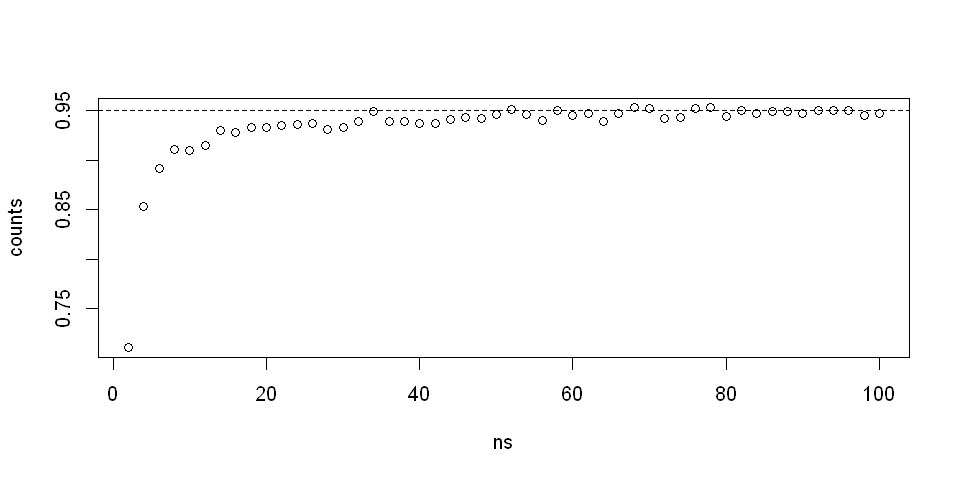

In [223]:
plot(ns,counts)
# lines(c(0,1000),c(0.95,0.95))
abline(h=.95,lty=2)

## next day...

* Increasing the significance will lead to broader intervals.
* systematic error at low sample sizes lead Guiness guy to develop the t-distribution.
* T-dist assumes sample comes from a normal distribution


In [224]:
repetitions = 1000
# sample_size=10
mu = 1

q_lo = qnorm(0.025)
q_hi = qnorm(0.975)

ns = vector()
counts = vector()
countst = vector()

for(sample_size in seq(2,100,1)){
    count = 0
    countt = 0
    ns =c(ns,sample_size)
    for (i in 1:repetitions){
#         x = rexp(sample_size,rate=1/mu)
        x = rnorm(sample_size,mu,1)
        m = mean(x)
        s = sd(x)

        lowerbound = m+q_lo*s/sqrt(sample_size)
        upperbound = m+q_hi*s/sqrt(sample_size)

        if( (mu>=lowerbound)&&(mu<=upperbound) ){
            count = count+1
        }
        
        # for the t-distirbution
        qt_lo = qt(0.025,df=sample_size-1)
        qt_hi = qt(0.975,df=sample_size-1)
        
        lowerboundt = m+qt_lo*s/sqrt(sample_size)
        upperboundt = m+qt_hi*s/sqrt(sample_size)

        if( (mu>=lowerboundt)&&(mu<=upperboundt) ){
            countt = countt+1
        }
    }
    #count/repetitions
    counts = c(counts,count/repetitions)
    countst = c(countst,countt/repetitions)
}

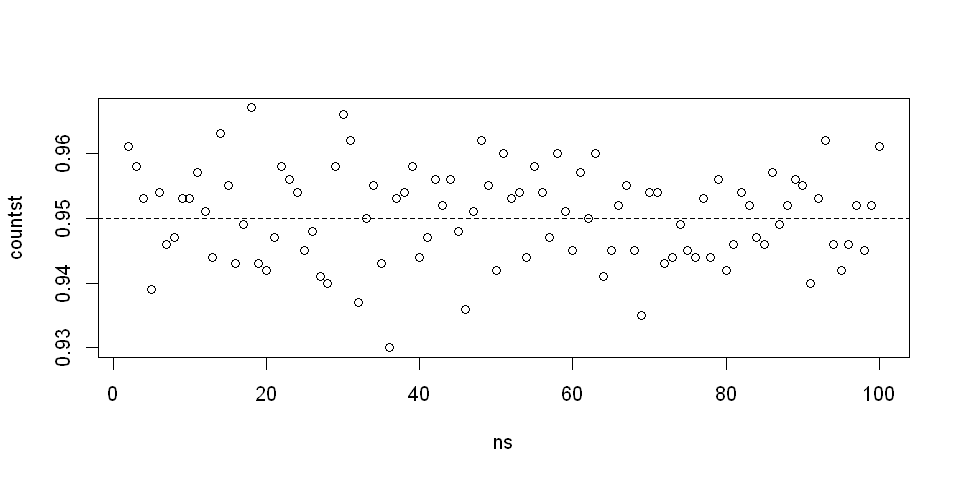

In [225]:
plot(ns,countst)
# lines(ns,counts)
# lines(c(0,1000),c(0.95,0.95))
abline(h=.95,lty=2)

## how does the t-dist approaches a normal?

In [234]:
options(repr.plot.width=4, repr.plot.height=4)

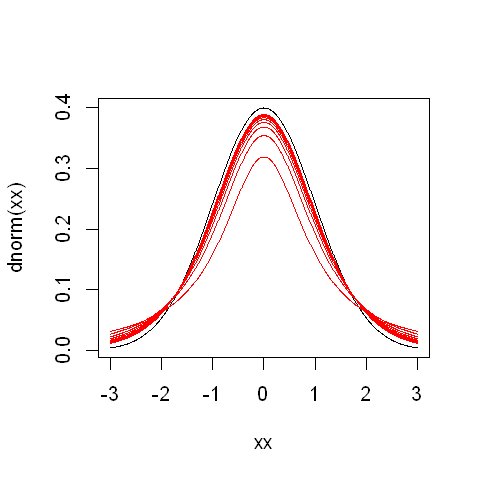

In [251]:

plot(xx,dnorm(xx),type = 'l',col='black')
for (n in seq(2,10,1)){
    lines(xx,dt(xx,df=n-1),type = 'l',col='red')
}

# Hypothesis testing

In [ ]:
# options(jupyter.plot_mimetypes = c("text/plain", "image/png" ))


* `if your null hypothesis cannot be true, you chose it wrong` _e.g. p-values of 10^-23)_
* Karl Popper: `Science progresses by rejection`
* Occam's razor _Numquam ponenda est pluritas sine necessitate_
* 


are _pem_ mutations homzygous lethal?

$H_0: P_{pem}=1/4 : H_1: P_{pem}<1/4$

for certain configurations, it may not be possible to have a significance level of 95%, because the data does not allow it..



Type I and Type II errors.
$\alpha$ and $\beta$
the issue of multiple testing : $1-(1-p)^n$